In [12]:
#training.py
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [13]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(X_train)

60000

In [15]:
len(X_test)

10000

X_train[0].shape

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

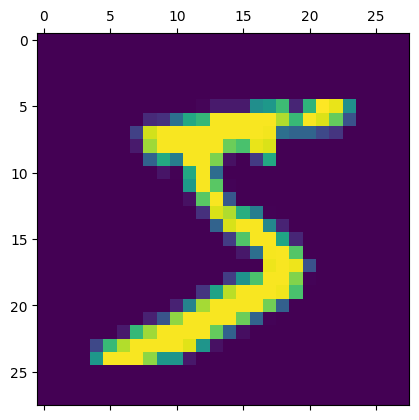

In [17]:
plt.matshow(X_train[0])

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])  

In [20]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.3755 - accuracy: 0.8960
Epoch 2/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.2147 - accuracy: 0.9399
Epoch 3/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.1668 - accuracy: 0.9524
Epoch 4/10
1875/1875 [==============================] - 1s 793us/step - loss: 0.1371 - accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.1169 - accuracy: 0.9660
Epoch 6/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.1039 - accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.0939 - accuracy: 0.9723
Epoch 8/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.0854 - accuracy: 0.9752
Epoch 9/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.0788 - accuracy: 0.9764
Epoch 10/10
1875/1875 [==============================] - 1s 790u

313/313 [==============================] - 0s 587us/step


Text(95.72222222222221, 0.5, 'Truth')

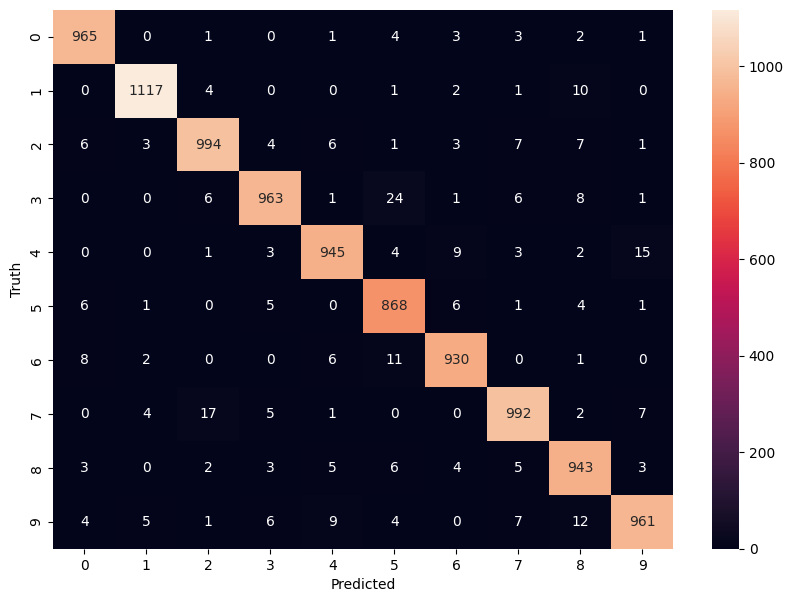

In [21]:
predicted = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [22]:
model.save('writing.keras')